In [19]:
import SimpleITK as sitk
import numpy as np
import cv2
from pathlib import Path
import utils as utils
import matplotlib.pyplot as plt

data_path = Path('/home/jseia/Desktop/MAIA/Clases/spain/misa/misa_lab/data/P2_data')

In [30]:
# Get brain masks from previous matlab code
for i in range(5):
    path = data_path / f'{i+1}/spm_seg_t1_t2.nii'
    brain_mask = sitk.ReadImage(path)
    bm_array = sitk.GetArrayFromImage(brain_mask)
    bm_array = np.where(bm_array > 0, 255, 0).astype('uint8')
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    bm_array = cv2.morphologyEx(bm_array, cv2.MORPH_CLOSE, se)
    img = sitk.GetImageFromArray(np.where(bm_array>0, 255, 0))
    img.SetDirection(brain_mask.GetDirection())
    img.SetOrigin(brain_mask.GetOrigin())
    img.SetSpacing(brain_mask.GetSpacing())
    path = data_path / f'{i+1}/brain_mask.nii'
    sitk.WriteImage(img, path)

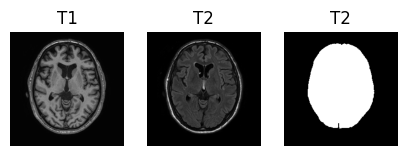

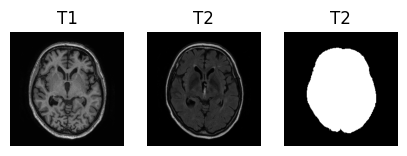

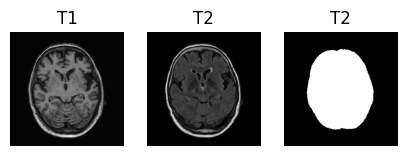

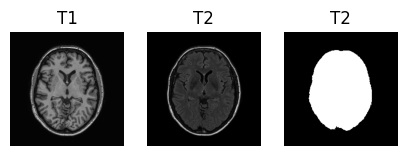

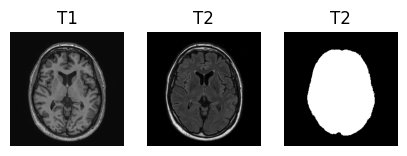

In [32]:
slice_n = 20
for i in range(5):
    t1 = sitk.ReadImage(data_path / f'{i+1}/T1.nii')
    t2 = sitk.ReadImage(data_path / f'{i+1}/T2_FLAIR.nii')
    bm = sitk.ReadImage(data_path / f'{i+1}/brain_mask.nii')
    t1_array = sitk.GetArrayFromImage(t1)
    t2_array = sitk.GetArrayFromImage(t2)
    bm = sitk.GetArrayFromImage(bm)
    t1_array = utils.min_max_norm(t1_array, 255, 'uint8')
    t2_array = utils.min_max_norm(t2_array, 255, 'uint8')
    plt.figure(figsize=(5, 3))
    plt.subplot(131)
    plt.title('T1')
    plt.imshow(t1_array[slice_n, :, :], cmap='gray')
    plt.axis('off')
    plt.subplot(132)
    plt.title('T2')
    plt.imshow(t2_array[slice_n, :, :], cmap='gray')
    plt.axis('off')
    plt.subplot(133)
    plt.title('T2')
    plt.imshow(bm[slice_n, :, :], cmap='gray')
    plt.axis('off')
    plt.show()